### Downloading necessary dependencies

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=8b493ad29531490fce68b444555a699c04ac5739b2b8d020762c84ee6f106daf
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
!pip install  tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install  pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install  keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Downloading CLINC150 Dataset and Glove word vector

In [ ]:
import wget
url = 'https://raw.githubusercontent.com/clinc/oos-eval/master/data/data_full.json'
wget.download(url)

url = 'https://www.dropbox.com/s/a247ju2qsczh0be/glove.6B.100d.txt?dl=1'
wget.download(url)

'glove.6B.100d.txt'

### Dataset preparing

In [ ]:
import numpy as np
import json

In [ ]:
# Loading json data
with open('data_full.json') as file:
  data = json.loads(file.read())

# Loading out-of-scope intent data
val_oos = np.array(data['oos_val'])
train_oos = np.array(data['oos_train'])
test_oos = np.array(data['oos_test'])

# Loading other intents data
val_others = np.array(data['val'])
train_others = np.array(data['train'])
test_others = np.array(data['test'])

# Merging out-of-scope and other intent data
val = np.concatenate([val_oos,val_others])
train = np.concatenate([train_oos,train_others])
test = np.concatenate([test_oos,test_others])

In [ ]:
data = np.concatenate([train,test,val])
data = data.T

text = data[0]
labels = data[1]

In [ ]:
set(labels)

{'accept_reservations',
 'account_blocked',
 'alarm',
 'application_status',
 'apr',
 'are_you_a_bot',
 'balance',
 'bill_balance',
 'bill_due',
 'book_flight',
 'book_hotel',
 'calculator',
 'calendar',
 'calendar_update',
 'calories',
 'cancel',
 'cancel_reservation',
 'car_rental',
 'card_declined',
 'carry_on',
 'change_accent',
 'change_ai_name',
 'change_language',
 'change_speed',
 'change_user_name',
 'change_volume',
 'confirm_reservation',
 'cook_time',
 'credit_limit',
 'credit_limit_change',
 'credit_score',
 'current_location',
 'damaged_card',
 'date',
 'definition',
 'direct_deposit',
 'directions',
 'distance',
 'do_you_have_pets',
 'exchange_rate',
 'expiration_date',
 'find_phone',
 'flight_status',
 'flip_coin',
 'food_last',
 'freeze_account',
 'fun_fact',
 'gas',
 'gas_type',
 'goodbye',
 'greeting',
 'how_busy',
 'how_old_are_you',
 'improve_credit_score',
 'income',
 'ingredient_substitution',
 'ingredients_list',
 'insurance',
 'insurance_change',
 'interest_rat

###Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_txt,test_txt,train_label,test_labels = train_test_split(text,labels,test_size = 0.3)

In [ ]:
import tensorflow as tf

### Preprocessing split dataset

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
Tokenizer= tf.keras.preprocessing.text.Tokenizer
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences

In [ ]:
ls=[]
for c in train_txt:
    ls.append(len(c.split()))
maxLen=int(np.percentile(ls, 98))

In [ ]:
embeddings_index={}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
emb_mean,emb_std

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


(0.004451992, 0.4081574)

In [ ]:
max_num_words = 40000
embedding_dim=len(embeddings_index['the'])
classes = np.unique(labels)

tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(train_txt)

train_sequences = tokenizer.texts_to_sequences(train_txt)
train_sequences = pad_sequences(train_sequences, maxlen=maxLen, padding='post')
test_sequences = tokenizer.texts_to_sequences(test_txt)
test_sequences = pad_sequences(test_sequences, maxlen=maxLen, padding='post')
word_index = tokenizer.word_index

In [ ]:
num_words = min(max_num_words, len(word_index) )+1
embedding_matrix = np.random.normal(emb_mean, emb_std, (num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_num_words:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(classes)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoder.fit(integer_encoded)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
train_label_encoded = label_encoder.transform(train_label)
train_label_encoded = train_label_encoded.reshape(len(train_label_encoded), 1)
train_label = onehot_encoder.transform(train_label_encoded)

In [ ]:
test_labels_encoded = label_encoder.transform(test_labels)
test_labels_encoded = test_labels_encoded.reshape(len(test_labels_encoded), 1)
test_labels = onehot_encoder.transform(test_labels_encoded)

### Model preparation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional,Embedding

In [ ]:
model = Sequential()

model.add(Embedding(num_words, 100, trainable=False,input_length=train_sequences.shape[1], weights=[embedding_matrix]))
model.add(Bidirectional(LSTM(256, return_sequences=True, recurrent_dropout=0.1, dropout=0.1), 'concat'))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=False, recurrent_dropout=0.1, dropout=0.1))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(classes.shape[0], activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 100)           634200    
                                                                 
 bidirectional (Bidirectiona  (None, 16, 512)          731136    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 512)           0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 50)                12850     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit(train_sequences, train_label, epochs = 20,
          batch_size = 64, shuffle=True,
          validation_data=[test_sequences, test_labels])

Epoch 1/20
260/260 [==============================] - 74s 231ms/step - loss: 4.7123 - acc: 0.0480 - val_loss: 3.9718 - val_acc: 0.0789
Epoch 2/20
260/260 [==============================] - 55s 212ms/step - loss: 3.3314 - acc: 0.1715 - val_loss: 2.2046 - val_acc: 0.4044
Epoch 3/20
260/260 [==============================] - 55s 212ms/step - loss: 2.1781 - acc: 0.3955 - val_loss: 1.5269 - val_acc: 0.5723
Epoch 4/20
260/260 [==============================] - 55s 211ms/step - loss: 1.6107 - acc: 0.5395 - val_loss: 1.0980 - val_acc: 0.6925
Epoch 5/20
260/260 [==============================] - 54s 209ms/step - loss: 1.2452 - acc: 0.6441 - val_loss: 0.8996 - val_acc: 0.7470
Epoch 6/20
260/260 [==============================] - 61s 235ms/step - loss: 1.0086 - acc: 0.7093 - val_loss: 0.7951 - val_acc: 0.7793
Epoch 7/20
260/260 [==============================] - 55s 211ms/step - loss: 0.8624 - acc: 0.7535 - val_loss: 0.7448 - val_acc: 0.7858
Epoch 8/20
260/260 [==============================] - 5

### Metrics visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

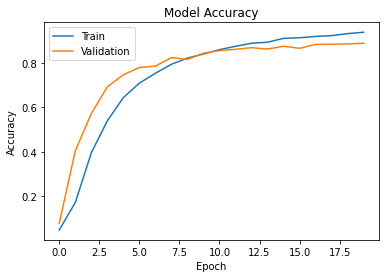

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

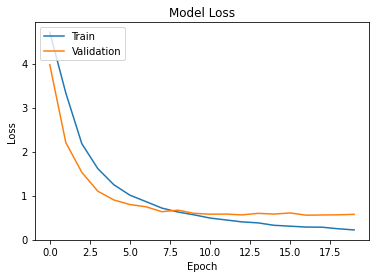

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Saving Model, Tokenizer, Label Encoder and Labels

In [ ]:
import pickle
import json

In [ ]:
model.save('model_intents.h5')

with open('classes.pkl','wb') as file:
   pickle.dump(classes,file)

with open('tokenizer.pkl','wb') as file:
   pickle.dump(tokenizer,file)

with open('label_encoder.pkl','wb') as file:
   pickle.dump(label_encoder,file)

In [ ]:
#extra

with open('padding.pkl','wb') as file:
   pickle.dump(pad,file)

### Predicting on real-time examples

In [ ]:
class IntentClassifier:
    def __init__(self,classes,model,tokenizer,label_encoder):
        self.classes = classes
        self.classifier = model
        self.tokenizer = tokenizer
        self.label_encoder = label_encoder

    def get_intent(self,text):
        self.text = [text]
        self.test_keras = self.tokenizer.texts_to_sequences(self.text)
        self.test_keras_sequence = pad_sequences(self.test_keras, maxlen=16, padding='post')
        self.pred = self.classifier.predict(self.test_keras_sequence)
        return label_encoder.inverse_transform(np.argmax(self.pred,1))[0]

In [ ]:
pip install keras==2.1.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.6/339.6 KB 24.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.1.6 which is incompatible.


In [ ]:
import pickle

from keras.models import load_model

model = load_model('model_intents.h5')

with open('classes.pkl','rb') as file:
  classes = pickle.load(file)


with open('label_encoder.pkl','rb') as file:
  label_encoder = pickle.load(file)


with open('tokenizer.pkl','rb') as file:
  tokenizer = pickle.load(file)

In [ ]:
nlu = IntentClassifier(classes,model,tokenizer,label_encoder)

In [ ]:
nlu.get_intent("change language from hindi to ennglish ")

1/1 [==============================] - 0s 31ms/step


'change_language'

In [ ]:
print(classes)

['accept_reservations' 'account_blocked' 'alarm' 'application_status'
 'apr' 'are_you_a_bot' 'balance' 'bill_balance' 'bill_due' 'book_flight'
 'book_hotel' 'calculator' 'calendar' 'calendar_update' 'calories'
 'cancel' 'cancel_reservation' 'car_rental' 'card_declined' 'carry_on'
 'change_accent' 'change_ai_name' 'change_language' 'change_speed'
 'change_user_name' 'change_volume' 'confirm_reservation' 'cook_time'
 'credit_limit' 'credit_limit_change' 'credit_score' 'current_location'
 'damaged_card' 'date' 'definition' 'direct_deposit' 'directions'
 'distance' 'do_you_have_pets' 'exchange_rate' 'expiration_date'
 'find_phone' 'flight_status' 'flip_coin' 'food_last' 'freeze_account'
 'fun_fact' 'gas' 'gas_type' 'goodbye' 'greeting' 'how_busy'
 'how_old_are_you' 'improve_credit_score' 'income'
 'ingredient_substitution' 'ingredients_list' 'insurance'
 'insurance_change' 'interest_rate' 'international_fees'
 'international_visa' 'jump_start' 'last_maintenance' 'lost_luggage'
 'make_call'

In [ ]:
''''''